## Import Library

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import re

## Data Understanding

In [122]:
df = pd.read_csv("data-pemilih-kpu.csv")  
print("Dataset Shape:", df.shape)
df

Dataset Shape: (13137, 2)


,nama,jenis_kelamin
0,ERWIN TJAHJONO,Laki-Laki
1,DAVIANDRIE ANDIKA BAHROENY,Laki-Laki
2,ELAN KURNIAWAN,Laki-Laki
3,AYU DWI CAHYANING MUKTI,Perempuan
4,WAHYOEDIN,Laki-Laki
...,...,...
13132,HERMANSYAH,Laki-Laki
13133,SITA.HJ,Perempuan
13134,MASNI TAMBUNAN,Perempuan
13135,MARJANEDI,Laki-Laki


## Exploratory Data Analysis (EDA)

C:\Users\Yusep fathul anwar\AppData\Local\Temp\ipykernel_9028\3596395602.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['jenis_kelamin'], palette="viridis")


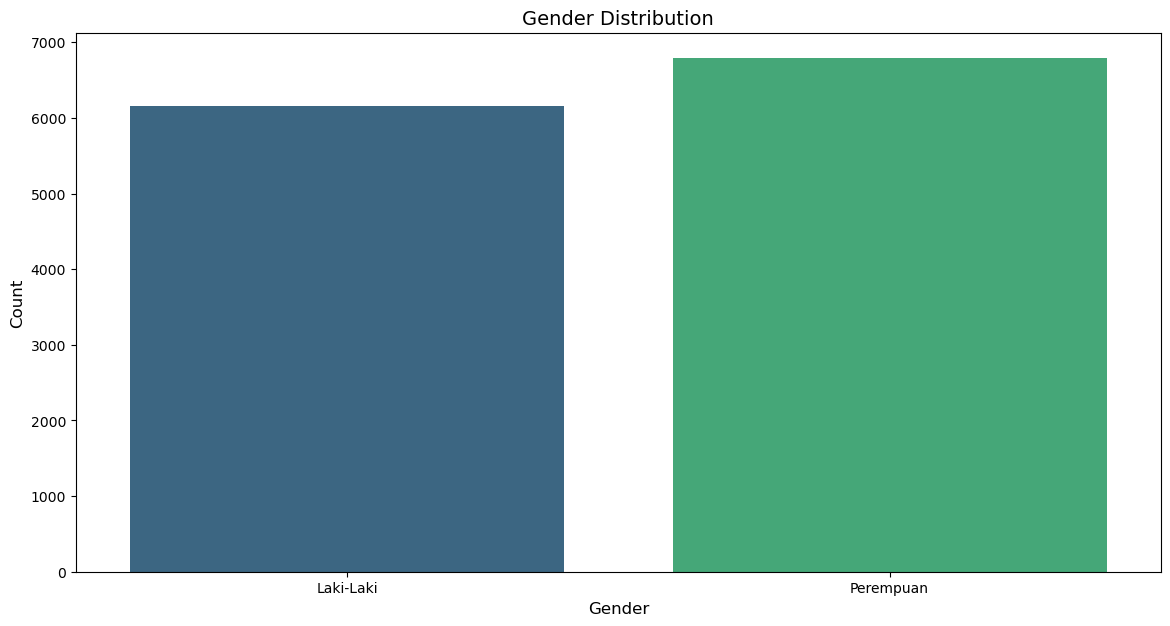

In [123]:
plt.figure(figsize=(14,7))  
sns.countplot(x=df['jenis_kelamin'], palette="viridis")
plt.title("Gender Distribution", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.xticks(rotation=0, ha='center')  #
plt.show()

## Data Preprocessing

In [124]:
df.isnull().sum()
df = df.dropna()

In [125]:
def clean_name(name):
    return re.sub(r'[^a-zA-Z]', ' ', name).lower().strip()

df['nama'] = df['nama'].apply(clean_name)

df.isnull().sum()

C:\Users\Yusep fathul anwar\AppData\Local\Temp\ipykernel_9028\2280200697.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nama'] = df['nama'].apply(clean_name)


nama             0
jenis_kelamin    0
dtype: int64

In [126]:
label_encoder = LabelEncoder()
df['jenis_kelamin'] = label_encoder.fit_transform(df['jenis_kelamin'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))  
print("Label Mapping:", label_mapping)

Label Mapping: {'Laki-Laki': 0, 'Perempuan': 1}


C:\Users\Yusep fathul anwar\AppData\Local\Temp\ipykernel_9028\252139083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['jenis_kelamin'] = label_encoder.fit_transform(df['jenis_kelamin'])


## Feature Engineering

In [127]:
X = df['nama']
y = df['jenis_kelamin']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

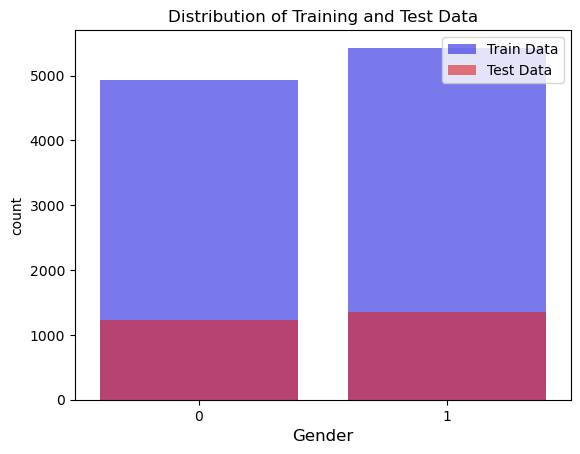

In [128]:
sns.countplot(x=y_train, label='Train Data', color='blue', alpha=0.6)
sns.countplot(x=y_test, label='Test Data', color='red', alpha=0.6)
plt.xlabel("Gender", fontsize=12)
plt.legend()
plt.title('Distribution of Training and Test Data')
plt.show()

In [129]:
# Vectorization with CountVectorizer using n-gram characters
vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(2,6))
vectorizer.fit(X_train.ravel())

X_train = vectorizer.transform(X_train.ravel())
X_test = vectorizer.transform(X_test.ravel())

C:\Users\Yusep fathul anwar\AppData\Local\Temp\ipykernel_9028\730331564.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  vectorizer.fit(X_train.ravel())
C:\Users\Yusep fathul anwar\AppData\Local\Temp\ipykernel_9028\730331564.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train = vectorizer.transform(X_train.ravel())
C:\Users\Yusep fathul anwar\AppData\Local\Temp\ipykernel_9028\730331564.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_test = vectorizer.transform(X_test.ravel())


## Modelling

In [130]:
model = LogisticRegression(max_iter=500, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, solver='liblinear')

## Evaluation Model

In [131]:
train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

# Evaluation model
print("Training Accuracy:", accuracy_score(y_train, train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Training Accuracy: 0.9963320463320463
Testing Accuracy: 0.9355212355212356
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      1232
           1       0.94      0.93      0.94      1358

    accuracy                           0.94      2590
   macro avg       0.94      0.94      0.94      2590
weighted avg       0.94      0.94      0.94      2590



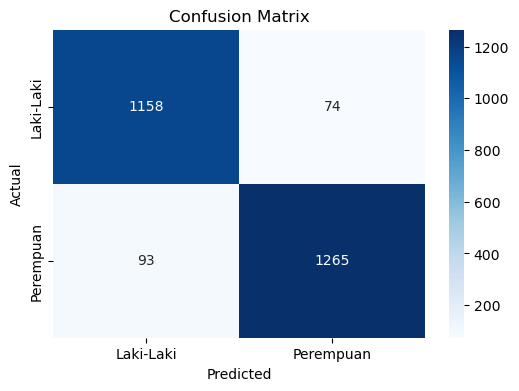

In [132]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Usage Example

In [134]:
def prediksi_jenis_kelamin(nama):
    nama = clean_name(nama)
    return label_encoder.inverse_transform([model.predict(vectorizer.transform([nama]))[0]])[0]
    return label_mapping[prediksi]

print(prediksi_jenis_kelamin("Yusep"))

Laki-Laki
